### Evaluation algorithms Metrics 
#### Guidness, implementation
Version 0.1
________________________________________

#### **Evaluation metrics for classification,Regression**

## [Classification Algorithms Metrics](#)
- [Confusion Matrix](#Confusion-Matrix)
- [Area under ROC Curve](#Area-under-ROC-Curve)
- [Log Loss](#Log-Loss)
- [Classification Accuracy](#Classification-Accuracy)
- [Classification Report](#Classification-Report)

you can show more methods [Here!  ](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) in ( Scikit-learn Classification mrtrics tutorial )

## [Regression Algorithms Metrics](#)
- [Root Mean Squared Error](#Root-Mean-Squared-Error)
- [Mean Absolute Error](#Mean-Absolute-Error)
- [Mean Squared Error](#Mean-Squared-Error)
- [R Squared/Adjusted R Squared](#R-Squared/Adjusted-R-Squared)
- [Root mean squared logarithmic error](#Root-mean-squared-logarithmic-error)

you can show more methods [Here!  ](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) in ( Scikit-learn Regression mrtrics tutorial )


### **Confusion Matrix**
#### `sklearn.metrics.confusion_matrix(y_true(y-test), y_pred(result of Algorithm Test Set), *, labels=None, sample_weight=None, normalize=None)`

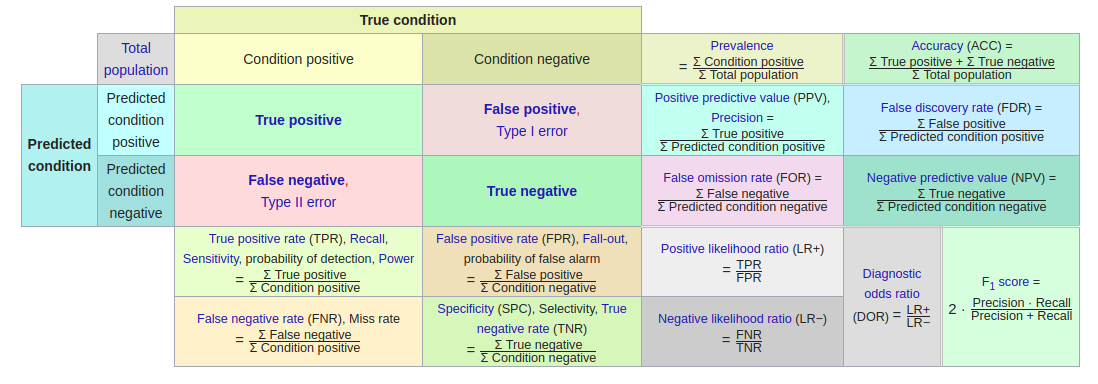

In [2]:
from IPython.display import Image
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//Confusion matrix.png',width=1000,height=200)

> Matrix Content..
>> Suppose we have two classes A , B --- Not that **Number of Columns = Number Of Classes**
- **True Positive** : Number of cases that **Algorithm**  predict it belong to **A** and it actually belong to **A**
- **False Negative** : Number of cases that **Algorithm**  predict it's NOT belong to **A** and it actually belong to **A**
- ^^
- **True Negative** Number of cases that **Algorithm**  predict it belong to **B** and it actually belong to **B**
- **False Negative** : Number of cases that **Algorithm**  predict it's NOT belong to **B** and it actually belong to **B**
- ^^
- And So on , if we have more classes .... 

> Sub-Terms
- |**Precision**| = Positive Predictive Value : The proportion of positive cases that were correctly predicted by Algorithm = [T(**A**)/ T**A**+F**A**](#).
- **|Recall|** = Sensitivity: The proportion of samples correctly predicted, for all cases that actually belong to this class in **all dataSet** = [T(**A**)/ T**A** + F(**B**)](#) Because **F(B) == T(A)**
>> By recall you can detect The Sensitivity of algorithm with each class !!! 
- **Accuracy** : the proportion of the total number of predictions that were correct = **T(A) + T(B) / Total population**

- Specificity: the proportion of actual negative cases that are correctly identified.

> Benfits **Confusion matrix does not only provide us errors made by our classification model but also <<the types of errors we made<<.**
- **High recall & low precision** represents most of the positive prediction are correctly recognized
>> **means** we have very less false negative **however** there is a significant increase in >> false positive.
- **Low recall & high precision** represents that we miss a lot of positive examples which inturns have high (false-negative )but those we predict as positive are for sure positive predictions.
- A **high precision** score gives more confidence to the model’s capability to classify **(A)** ,Combining this with **Recall** gives an idea of how many of the total **(A)**s it was able to cover.

#### >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> >>> **[Real Case Ex](#)**.

##### In the case of health care organizations, they will be more concerned with a minimal wrong positive diagnosis. 
##### They will be more focused on high specificity. On the other hand, another predictive model will be more concerned with Sensitivity.

``array = dataframe.values
X = array[:,0:8] # 8 is number of feature - 1
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix) # to print the simple matrix
`#Confusion_Matrix.print_stats() # to print all Details and results ``
____________________________ OutPut

diagonal line of the matrix (which are correct predictions).

`[[141 21]
[ 41 51]]`

### >> >> >> >> >> Visualize_confusion_matrix

In [ ]:
# Method Body
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,color='g')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('\nPredicted label\nACCURACY = {:0.4f} \t MisClass={:0.4f}'.format(accuracy, misclass),color='r')
    plt.show()
    
    
# Method Working 
plot_confusion_matrix(cm           = confusion_matrix(Y_validation, predictions), 
                      normalize    = False,
                      target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                      title        = "Confusion Matrix\n")

____________________________________________

### Area under ROC Curve 
(or AUC for short) 

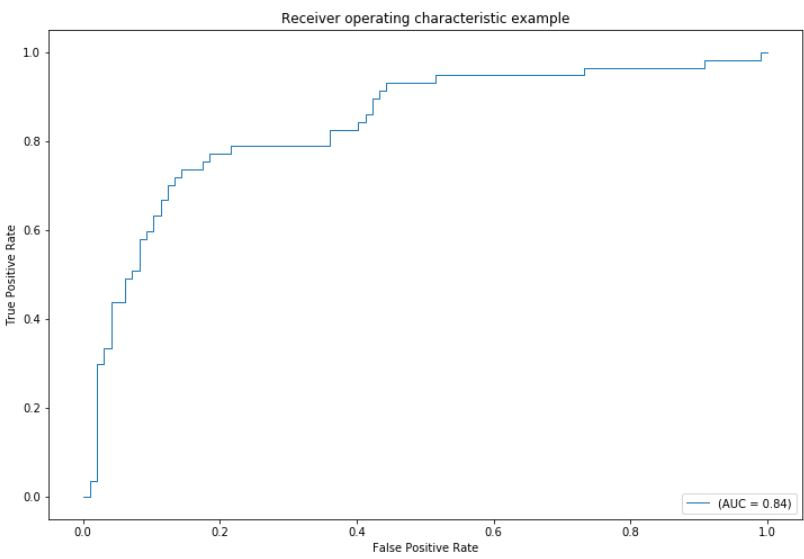

In [6]:
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//AUC.JPG',width=500,height=200)


#### is a performance metric for **binary classification problems** (0,1). 
#### The AUC represents a model’s ability to discriminate between positive and negative classes. 
- An area of 1.0 represents a model that made all predictions perfectly. An area of
- 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity. 
#### A binary classification problem is really a trade-off between sensitivity and specificity.
#####  Sensitivity is the true positive rate also called the recall. It is the number of instances
from the positive (first) class that actually predicted correctly.10.2. Classification Metrics 65
#####  Specificity is also called the true negative rate. Is the number of instances from the
negative (second) class that were actually predicted correctly.

- ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

> benfits
- The Different Machine learning models curves can be checked with different thresholds.
- Model predictive capability is summarized by the area under the curve(AUC).
- AUC is considered to be scaled variant, it measures the rank of predictions rather than its absolute values
- AUC always focuses on the quality of the Model’s skills on prediction irrespective of what threshold has been chosen.

In [ ]:
# Ex. Run a simple linear classifier    

#   - Split-out validation dataset
#--------------------------------------------------------------------------------
array = DF.values
X = array[:,0:8] # All features without target
Y = array[:,8] # The Output we need to predict
validation_size = 0.20 # ex.
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#---------------------------------------------------------------------------------

# - Run your Classification algorithm
clf = LogisticRegression(solver='lbfgs') 
clf.fit(X_train, Y_train)
y_preds = clf.predict_proba(X_validation)
# --------------------------------------------------------------------------------

# Calculate AUC
fpr, tpr, thresholds = roc_curve(Y_validation, y_preds[:,1])    
roc_auc = auc(fpr, tpr)
#---------------------------------------------------------------------------------

# Plot AUC
fig = plt.figure(figsize =(16,8))
ax2 = plt.axes()
ax2.plot(fpr, tpr, lw=1, label='(AUC = %0.2f)' % (roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('************Title***********')
plt.legend(loc="lower right")
plt.show()

___________________________________

## Log Loss
- Log Loss is the most important classification metric based on probabilities.
- Log Loss function answers the question "**How likely did the model think the actually observed set of outcomes was.**" 

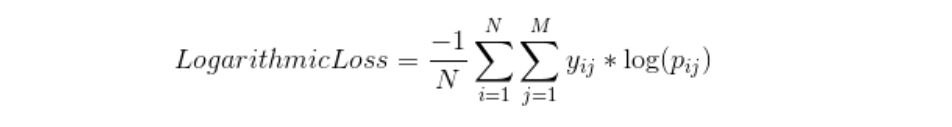

In [8]:
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//LOGGLOSS.JPG',width=1000,height=200)

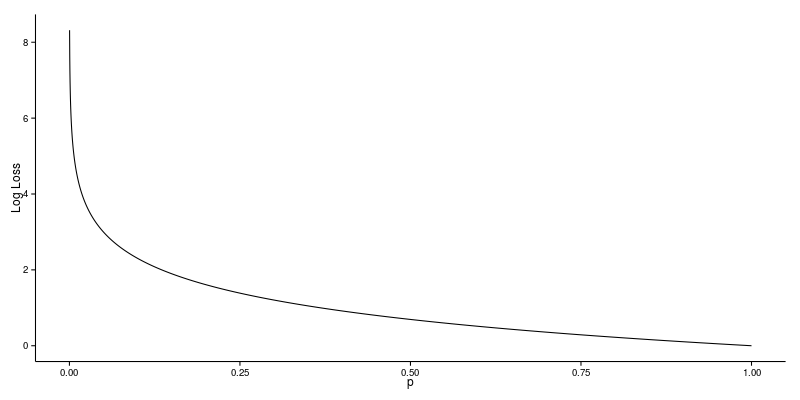

In [9]:
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//log-loss-curve.png',width=1000,height=200)

Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the
measure is inverted to be ascending when using the cross val score() function.

`sklearn.metrics.log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)`

_____________

## Classification Accuracy
- Classification accuracy is the number of correct predictions made as a ratio of all predictions made. 
- This is the most common evaluation metric for classification problems, it is also the most misused. 
- It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important.

`sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)`

the ratio is reported. This can be converted into a percentage by multiplying
the value by 100, giving an accuracy score of approximately XX% accurate

____________

## Classification Report

`sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')`

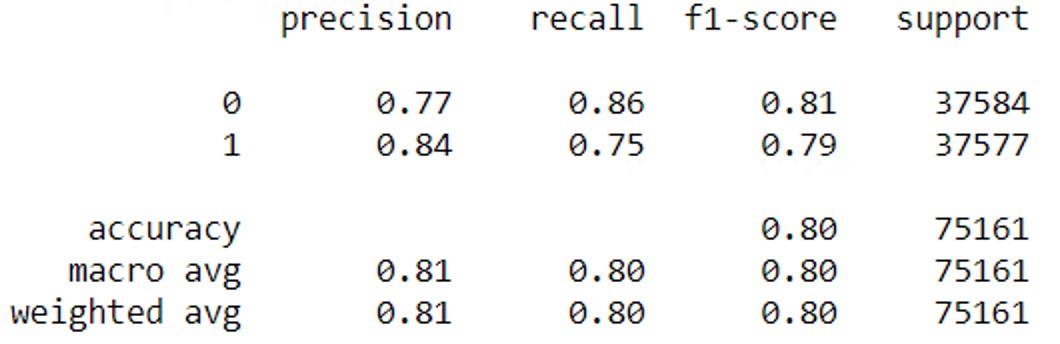

In [12]:
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//ClassReport.JPG',width=700,height=200)

> Cntent
- **|Precision|** = Positive Predictive Value : The proportion of positive cases that were correctly predicted by Algorithm.
- **|Recall|** = Sensitivity: The proportion of samples correctly predicted, for all cases that actually belong to this class in **all dataSet** . 
- **|F1-Score|** : = **[(2*Precision * Recall) / (Precision + Recall)]** >>> [0,1] == **Accuracy**
### **F1 Score** 

#### is the harmonic mean for precision and recall values. The formula for F1 score goes this way

### The higher the F1 score more is the predictive power of the classification model. [ 0 , 1 ]
- A score close to 1 means a perfect model, 
- however, score close to 0 shows decrement in the model’s predictive capability

### F1 Score is needed when you want to seek a balance between Precision and Recal
>- **|Support|** = The real Number of Class elements.

___________________

___________

## Root Mean Squared Error

- the most popular metrics used in Regression problems.
- RMSE is defined by the standard deviation of prediction errors. 
- These prediction errors are some times called Residuals. 
- Residuals are basically the measurement of the distance of data points from the Regression line.

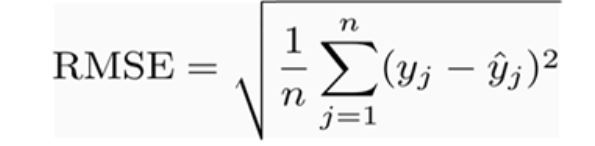

In [15]:
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//RMSE.JPG',width=500,height=200)

`sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

-  With RMSE it is assumed residuals are unbiased and follow a **normal distribution**.
- Before using RMSE be sure that there are no outliers in the dataset because RMSE is heavily influenced by outliers.
- Root mean squared error has higher weightage and it also penalizes errors as compared to other evaluation metrics.


__________________

## Mean Absolute Error

- The Average taken between the original values and predicted values
- It also measures the average magnitude of error i.e.how far the predictions from the actual output. 
- Moreover, MAE does not provide us any direction of error i.e. whether we are overfitting the data or underfitting the data.

`sklearn.metrics.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')`

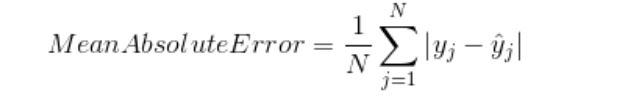

In [17]:
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//MAE.JPG',width=600,height=200)

_______________

## Mean Squared Error

- MSE takes the average of the square of the difference between the original values and the predicted values. 
- In MSE computation of gradient becomes easier than MAE which requires computational tools in order to compute gradients.
- Mean Squared Error is good to use when the target column is **normally distributed around the mean value**. 
- Mean squared error comes into the picture when outliers are present in our dataset and it becomes necessary to penalize them.

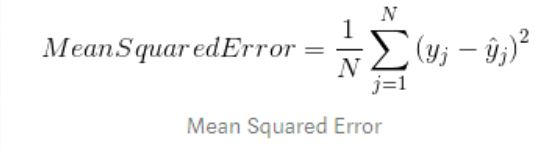

In [18]:
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//MSE.JPG',width=600,height=200)

______________________

## R Squared/Adjusted R Squared

- is a statistical measure of **how close the data point is fitted to the regression line**. 
- It is also known as the coefficient of determination.R-Squared is defined by the explained variation divided by total variation that is explained by the linear model.
- R squared value always lies between 0% to 100 %  Callled > the coefficient

This is a value between 0 and 1 for no-fit and perfect fit respectively

`sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')`

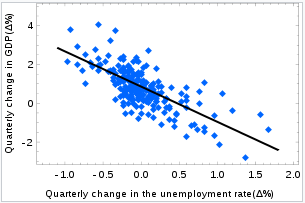

In [21]:
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//1_c5zGFsnErW39SadvJcvtcw.png',width=500,height=200)

- The **adjusted R-squared** is a modified version of R-squared that has been adjusted for the number of predictors in the model. 
- It increases only if the new term improves the model more than would be expected by chance. 
- Adjusted R-squared is not a typical model for comparing non-linear models, but multiple linear regressions

_____________________

## Root mean squared logarithmic error
Mean squared logarithmic error regression loss

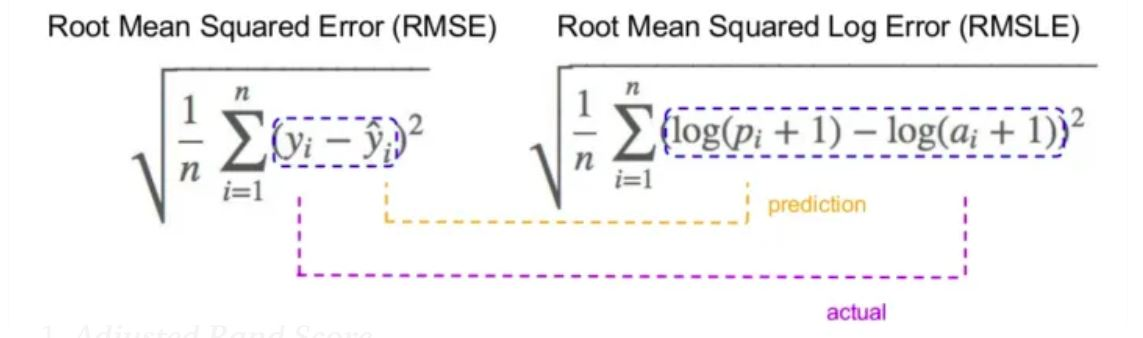

In [23]:
Image(filename='F://Careers//Machine Learning//Articls - photos - Cheatsheets//RootLog.JPG',width=800,height=200)

`sklearn.metrics.mean_squared_log_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')`

- This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc. 
- Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate.